In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_16_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation, :]
x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_16_4.pickle','rb') as file:
    output_data = pickle.load(file)
    
output_data = np.transpose(output_data)
output_data = output_data[permutation, :]
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 50, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/50
100000/100000 - 4s - loss: 0.2600 - accuracy: 0.8905 - val_loss: 0.1910 - val_accuracy: 0.9136
Epoch 2/50
100000/100000 - 3s - loss: 0.1834 - accuracy: 0.9142 - val_loss: 0.1786 - val_accuracy: 0.9181
Epoch 3/50
100000/100000 - 3s - loss: 0.1698 - accuracy: 0.9203 - val_loss: 0.1688 - val_accuracy: 0.9221
Epoch 4/50
100000/100000 - 3s - loss: 0.1586 - accuracy: 0.9262 - val_loss: 0.1578 - val_accuracy: 0.9278
Epoch 5/50
100000/100000 - 3s - loss: 0.1482 - accuracy: 0.9319 - val_loss: 0.1474 - val_accuracy: 0.9324
Epoch 6/50
100000/100000 - 3s - loss: 0.1387 - accuracy: 0.9364 - val_loss: 0.1375 - val_accuracy: 0.9362
Epoch 7/50
100000/100000 - 4s - loss: 0.1287 - accuracy: 0.9409 - val_loss: 0.1275 - val_accuracy: 0.9420
Epoch 8/50
100000/100000 - 3s - loss: 0.1184 - accuracy: 0.9452 - val_loss: 0.1153 - val_accuracy: 0.9450
Epoch 9/50
100000/100000 - 3s - loss: 0.1090 - accuracy: 0.9486 - val_loss: 0.1115 - val_accuracy: 0.9

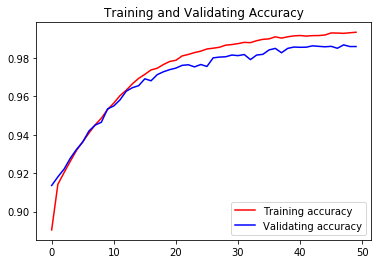

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
predict = model.predict(x_test)

In [9]:
print(predict.shape)

(2500, 12)


In [7]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0256 - accuracy: 0.9851


[0.046103379821032284, 0.98506653]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_16_4_model.h5')